In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
df = pd.read_csv(url)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Basic info and missing value

In [13]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (891, 12)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# Fill Age with median, Embarked with mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop "Cabin" (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

/tmp/ipython-input-14-3384213365.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-14-3384213365.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Bar Graph – Survival Count

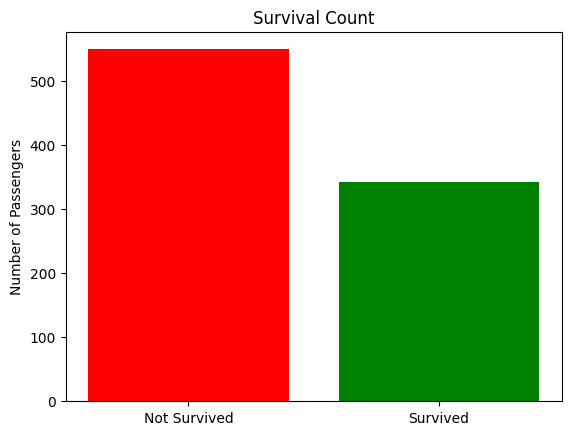

In [15]:
# Bar Graph - Survival count
survived_count = df['Survived'].value_counts()
plt.bar(['Not Survived', 'Survived'], survived_count, color=['red', 'green'])
plt.title('Survival Count')
plt.ylabel('Number of Passengers')
plt.show()

Bar Graph – Survival by Gender

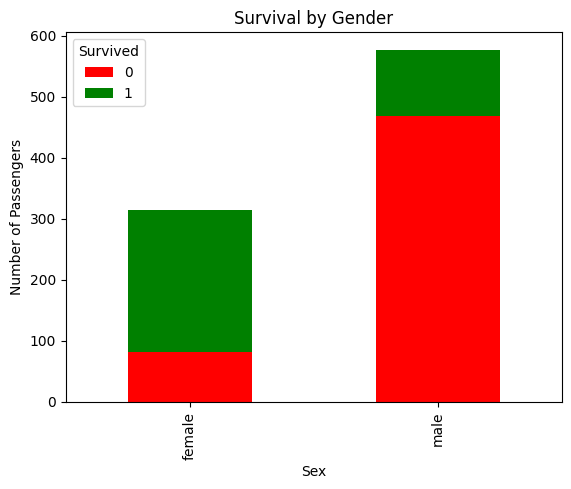

In [16]:
# Bar Graph - Survival by gender
gender_survival = df.groupby('Sex')['Survived'].value_counts().unstack()
gender_survival.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival by Gender')
plt.ylabel('Number of Passengers')
plt.show()

Histogram – Age Distribution

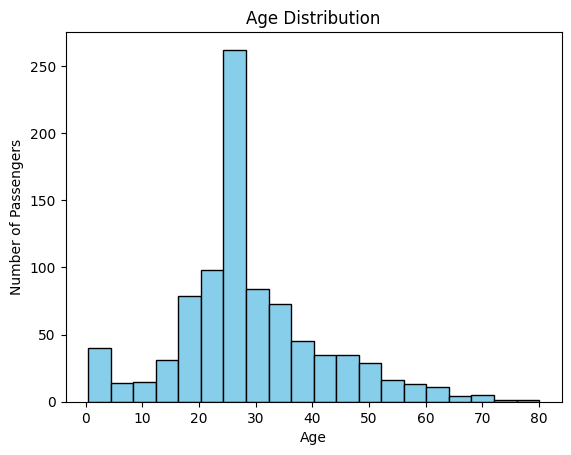

In [17]:
# Histogram - Age distribution
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

Box Plot – Age by Passenger Class

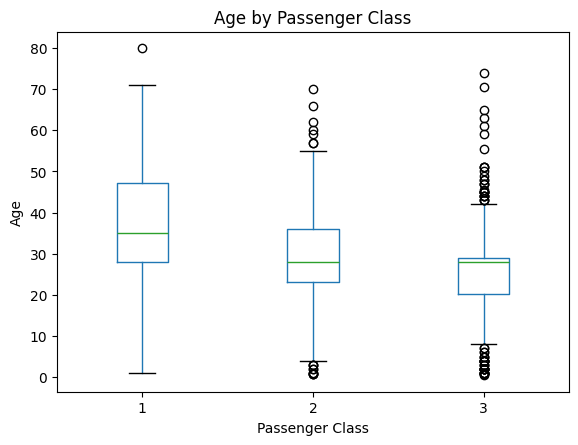

In [18]:
# Pandas boxplot
df.boxplot(column='Age', by='Pclass', grid=False)
plt.title('Age by Passenger Class')
plt.suptitle('')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

Pie Chart – Embarkation Points (Embarkation Point means the port from where a passenger boarded the ship)

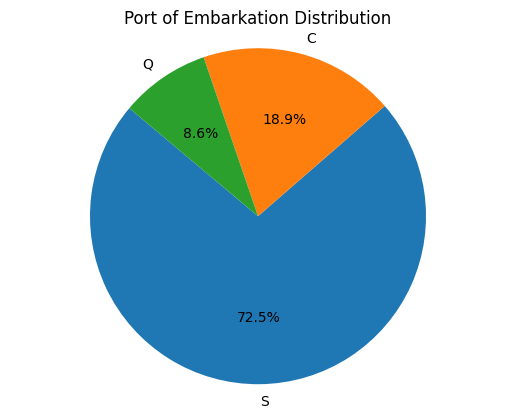

In [19]:
# Pie chart
embark_counts = df['Embarked'].value_counts()
plt.pie(embark_counts, labels=embark_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Port of Embarkation Distribution')
plt.axis('equal')
plt.show()

Scatter Plot – Age vs Fare

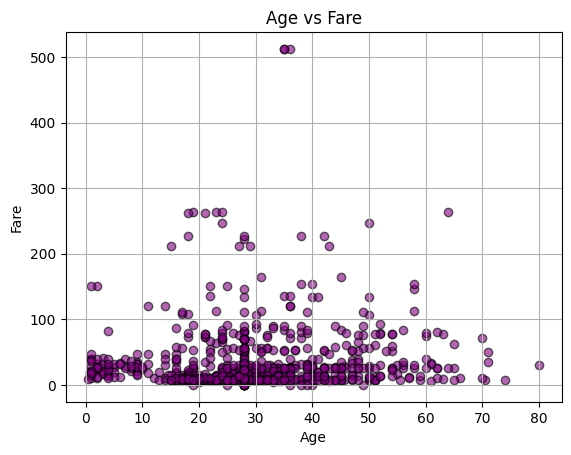

In [20]:
# Scatter plot - Age vs Fare
plt.scatter(df['Age'], df['Fare'], alpha=0.6, color='purple', edgecolor='k')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

**Insights**:
- Most passengers did not survive (62%).
- Female passengers had a much higher survival rate.
- Age was concentrated around 20–40 years.
- 1st class passengers tended to be older and paid more.
- Most people boarded from Southampton.
- Scatter plot shows that high fares were mostly paid by younger or middle-aged passengers.
